### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, mannwhitneyu, shapiro, ttest_ind
from scipy import stats
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms

from Toolbox_ML import *

### Data

In [3]:
iris = pd.read_csv("./data/iris.csv")
boston = pd.read_csv("./data/obligatoria_hard.csv", sep = "|")

## Toolbox_ML

### Función | describe_df

In [4]:
describe_df(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
Tipos,float64,float64,float64,float64,object
% Faltante,0.0,0.0,0.0,0.0,0.0
Valores Únicos,35,23,43,22,3
% Cardinalidad,23.33,15.33,28.67,14.67,2.0


In [5]:
describe_df(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Tipos,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,504,26,76,2,81,446,356,412,9,66,46,455,229
% Cardinalidad,99.6,5.14,15.02,0.4,16.01,88.14,70.36,81.42,1.78,13.04,9.09,89.92,45.26


### Función | tipifica_variables

In [6]:
tipifica_variables(iris, umbral_categoria = 5, umbral_continua = 10)

,nombre_variable,tipo_sugerido
0,sepal_length,Numérica Continua
1,sepal_width,Numérica Continua
2,petal_length,Numérica Continua
3,petal_width,Numérica Continua
4,species,Categórica


In [7]:
tipifica_variables(boston, umbral_categoria = 5, umbral_continua = 10)

,nombre_variable,tipo_sugerido
0,CRIM,Numérica Continua
1,ZN,Numérica Discreta
2,INDUS,Numérica Continua
3,CHAS,Binaria
4,NOX,Numérica Continua
5,RM,Numérica Continua
6,AGE,Numérica Continua
7,DIS,Numérica Continua
8,RAD,Numérica Discreta
9,TAX,Numérica Continua


### Función | get_features_num_regression

In [8]:
get_features_num_regression(iris, "sepal_length", 0.5)

['petal_length', 'petal_width']

In [9]:
get_features_num_regression(iris, "petal_length", 0.8)

['sepal_length', 'petal_width']

In [10]:
get_features_num_regression(iris, "petal_length", 0.9)

['petal_width']

In [11]:
get_features_num_regression(iris, "petal_length", 0.5, 0.001)

['sepal_length', 'petal_width']

In [12]:
get_features_num_regression(iris, "sepal_width", 0.7, 0.05)

No hay columna numérica que cumpla con las especificaciones de umbral de correlación y/o p-value.


In [13]:
get_features_num_regression(iris, "species", 0.5, 0.001)

Error: La columna species no es numérica.


In [14]:
get_features_num_regression(iris, "petal_length", 0.5, 1.2)

Error: El parametro pvalue 1.2  está fuera del rango [0,1].


In [15]:
get_features_num_regression(iris, "sepal_width", 0.7, 0.05)

No hay columna numérica que cumpla con las especificaciones de umbral de correlación y/o p-value.


In [16]:
get_features_num_regression(boston, "MEDV", 0.1)

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [17]:
get_features_num_regression(boston, "MEDV", 0.5)

['RM', 'PTRATIO', 'LSTAT']

In [18]:
get_features_num_regression(boston, "RM", 0.3)

['ZN', 'INDUS', 'NOX', 'PTRATIO', 'LSTAT', 'MEDV']

In [19]:
get_features_num_regression(boston, "MEDV", 0.5, 0.001)

['RM', 'PTRATIO', 'LSTAT']

### Función | plot_features_num_regression

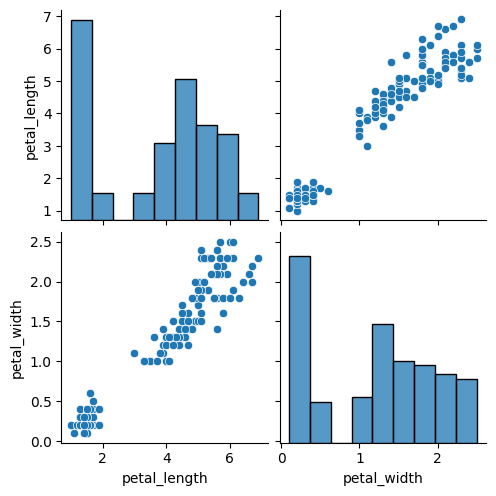

['petal_width']

In [20]:
plot_features_num_regression(iris, "petal_length", ["petal_width", "species"], umbral_corr = 0.4)

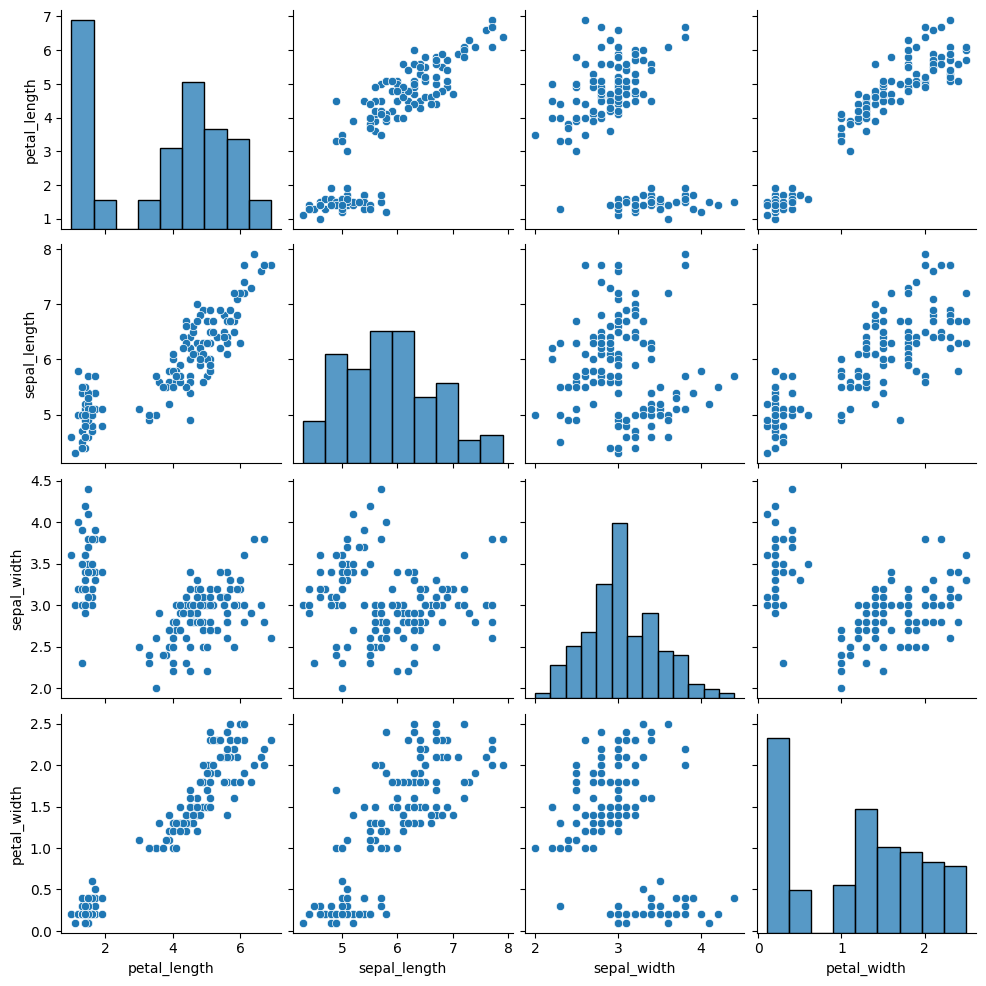

['sepal_length', 'sepal_width', 'petal_width']

In [21]:
plot_features_num_regression(iris, "petal_length", umbral_corr = 0.4)

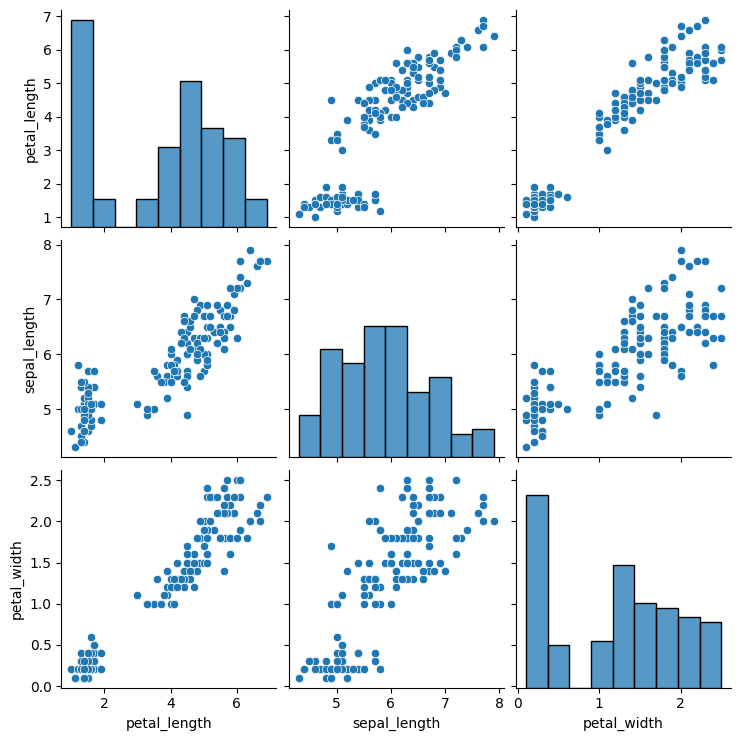

['sepal_length', 'petal_width']

In [22]:
plot_features_num_regression(iris, "petal_length", umbral_corr = 0.7)

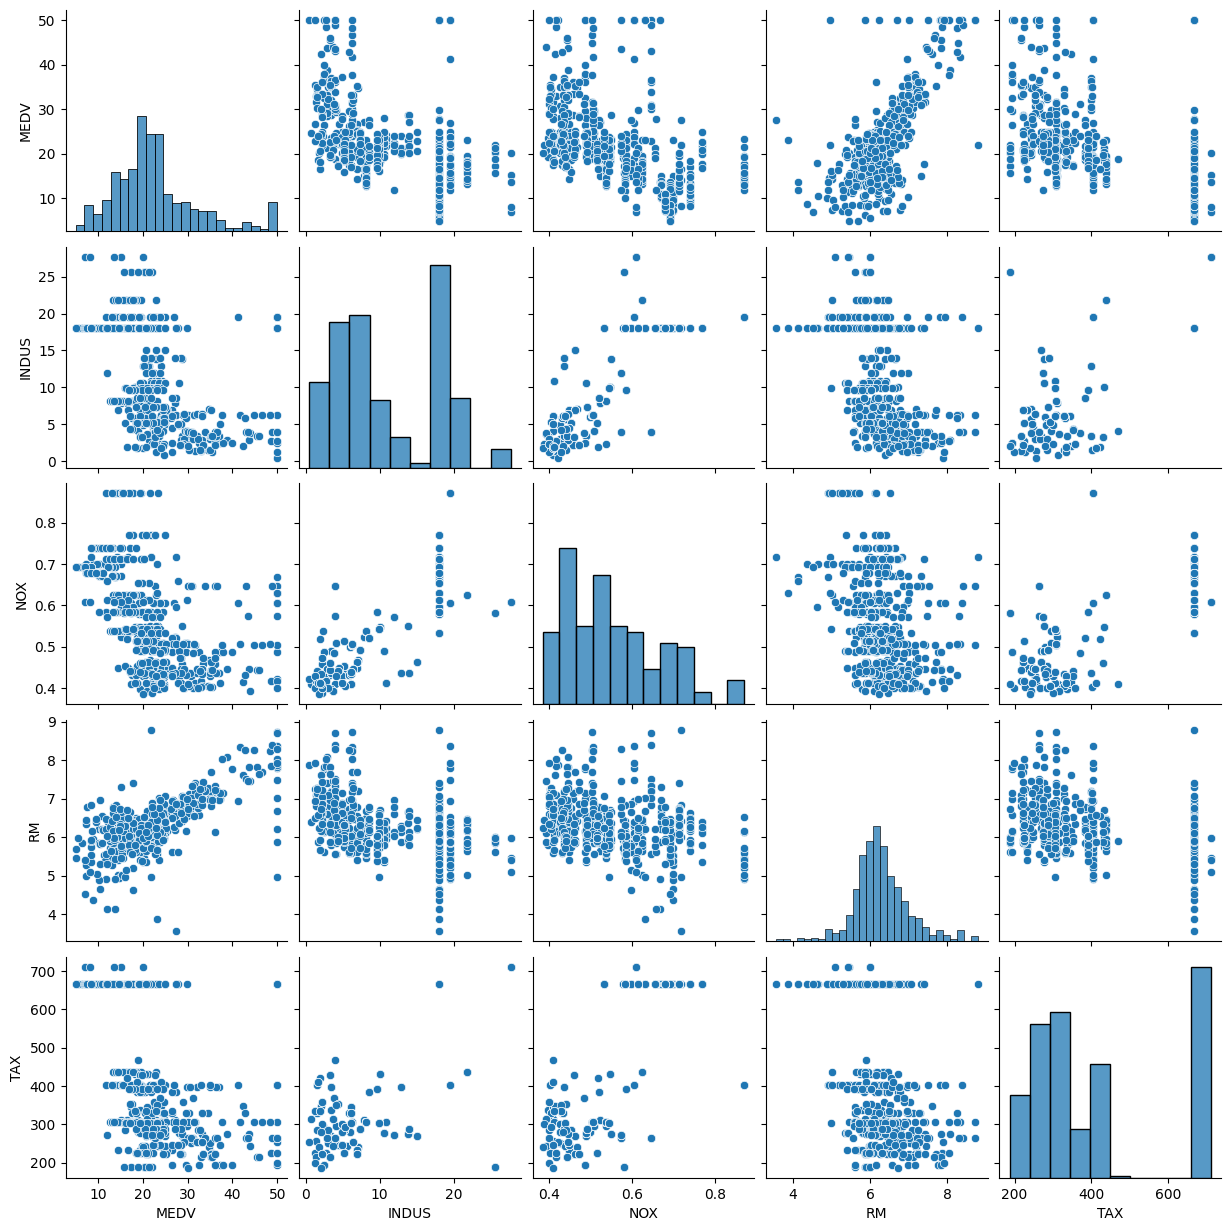

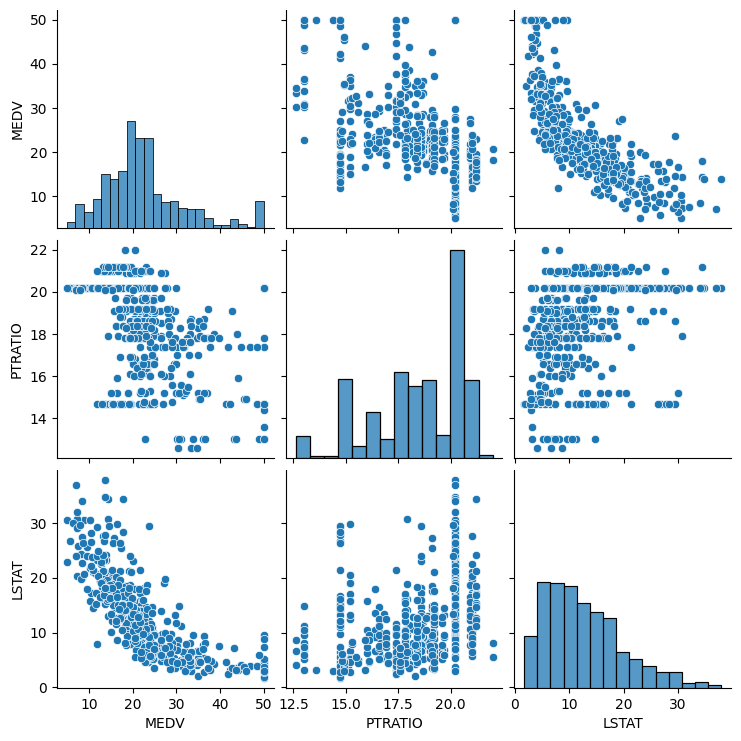

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

In [23]:
plot_features_num_regression(boston, "MEDV", umbral_corr = 0.4)

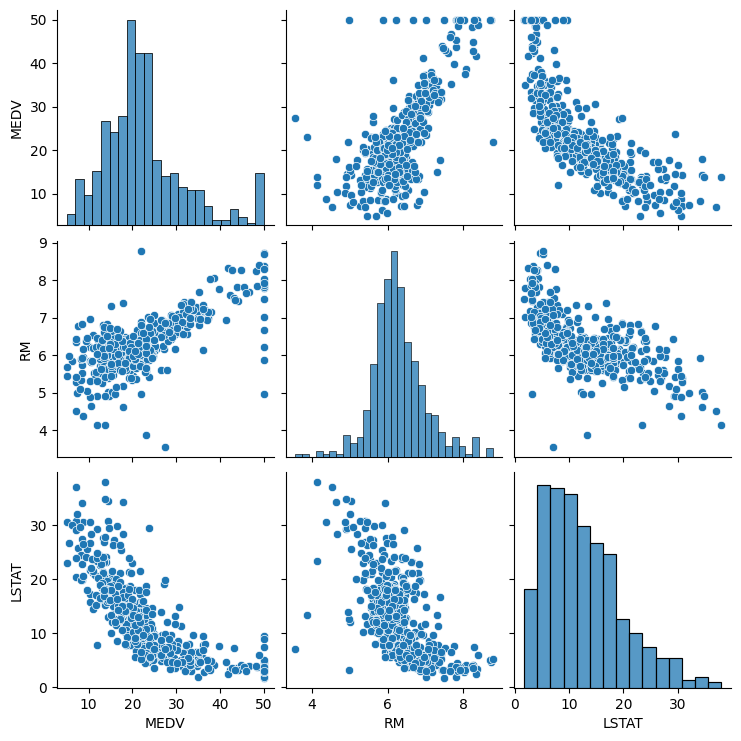

['RM', 'LSTAT']

In [24]:
plot_features_num_regression(boston, "MEDV", umbral_corr = 0.6)

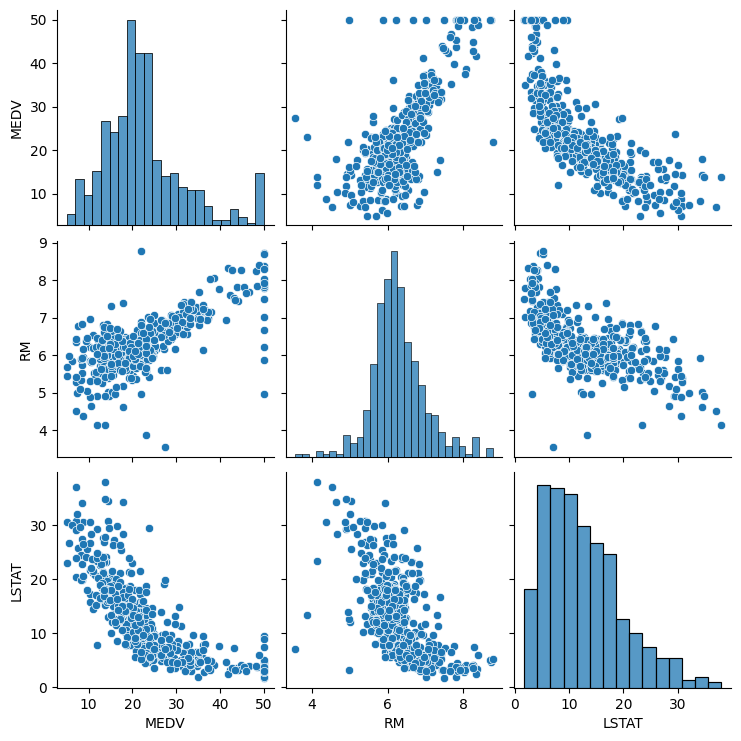

['RM', 'LSTAT']

In [25]:
plot_features_num_regression(boston, "MEDV", umbral_corr = 0.6, pvalue = 0.5)

### Función | get_features_cat_regression Versión "seguir el enunciado"

In [26]:
get_features_cat_regression(iris, "sepal_width")

['species']

In [33]:
get_features_cat_regression(iris, "species")

Error: El parametro target  species  no es una columna numérica continua del dataframe.


In [34]:
get_features_cat_regression(iris, "petal_width", pvalue= 0.9)

['species']

In [35]:
get_features_cat_regression(iris, "sepal_length", pvalue= 0.05)

['species']

In [37]:
get_features_cat_regression(iris, "petal_width", pvalue= 1.5)

Error: El parametro pvalue 1.5  está fuera del rango [0,1].


In [39]:
get_features_cat_regression(iris, "MEDV")

Error: El parámetro target  MEDV  no es una columna del Dataframe.


In [27]:
get_features_cat_regression(boston, "MEDV")

['CHAS']

In [40]:
get_features_cat_regression(boston, "PTRATIO", pvalue=0.05)

Error: El parametro target  PTRATIO  no es una columna numérica continua del dataframe.


In [43]:
get_features_cat_regression(boston, "DIS", pvalue=0.8)

['CHAS']

In [44]:
get_features_cat_regression(boston, "species", pvalue=0.8)

Error: El parámetro target  species  no es una columna del Dataframe.


In [46]:
get_features_cat_regression(boston, "DIS", pvalue=1.1)

Error: El parametro pvalue 1.1  está fuera del rango [0,1].


In [51]:
get_features_cat_regression(boston, "RM", 0.95)

['CHAS']

### Función | get_features_cat_regression Versión "Lo nuestro"

In [28]:
get_features_cat_regression_v2(iris, "sepal_width")

[]

In [52]:
get_features_cat_regression_v2(iris, "species")

Error: El parametro target  species  no es una columna numérica continua del dataframe.


In [53]:
get_features_cat_regression_v2(iris, "petal_width", pvalue= 0.9)
# el resultado de las v2 cambia

[]

In [54]:
get_features_cat_regression_v2(iris, "sepal_length", pvalue= 0.05)
# el resultado de las v2 cambia

[]

In [56]:
get_features_cat_regression_v2(iris, "petal_width", pvalue= 3)

Error: El parametro pvalue 3  está fuera del rango [0,1].


In [57]:
get_features_cat_regression_v2(iris, "MEDV")

Error: El parámetro target  MEDV  no es una columna del Dataframe.


In [29]:
get_features_cat_regression_v2(boston, "MEDV")

['CHAS']

In [58]:
get_features_cat_regression_v2(boston, "PTRATIO", pvalue=0.05)
# La v1 no la consideraba numérica continua

['CHAS']

In [59]:
get_features_cat_regression_v2(boston, "DIS", pvalue=0.8)

['CHAS']

In [60]:
get_features_cat_regression_v2(boston, "species", pvalue=0.8)

Error: El parámetro target  species  no es una columna del Dataframe.


In [61]:
get_features_cat_regression_v2(boston, "DIS", pvalue=1.1)

Error: El parametro pvalue 1.1  está fuera del rango [0,1].


In [62]:
get_features_cat_regression_v2(boston, "RM", 0.95)

['CHAS']

### Función | plot_features_cat_regression

In [30]:
plot_features_cat_regression(iris, "petal_length", ["petal_width", "species"], 0.4)

c:\Users\marce\Documents\The_Bridge\ML_Toolbox\Team_Challenge\Toolbox_ML\Toolbox_ML.py:422: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


[]

In [31]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


c:\Users\marce\Documents\The_Bridge\ML_Toolbox\Team_Challenge\Toolbox_ML\Toolbox_ML.py:422: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


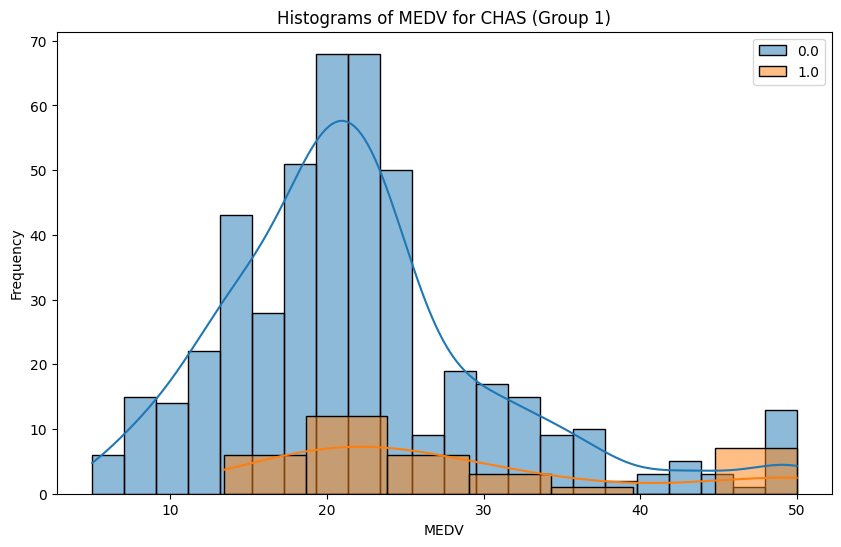

['CHAS']

In [32]:
plot_features_cat_regression(boston, "MEDV", ["CHAS", "RM"], 0.4)